# Loading Avocado Data

In [5]:
import pandas as pd

# Loading avocado data
avocado_data = pd.read_csv('C:/Users/tthan/Data Projects/Avocado/avocado.csv')

print(avocado_data.head())


   Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015 

# Price Trends by Region

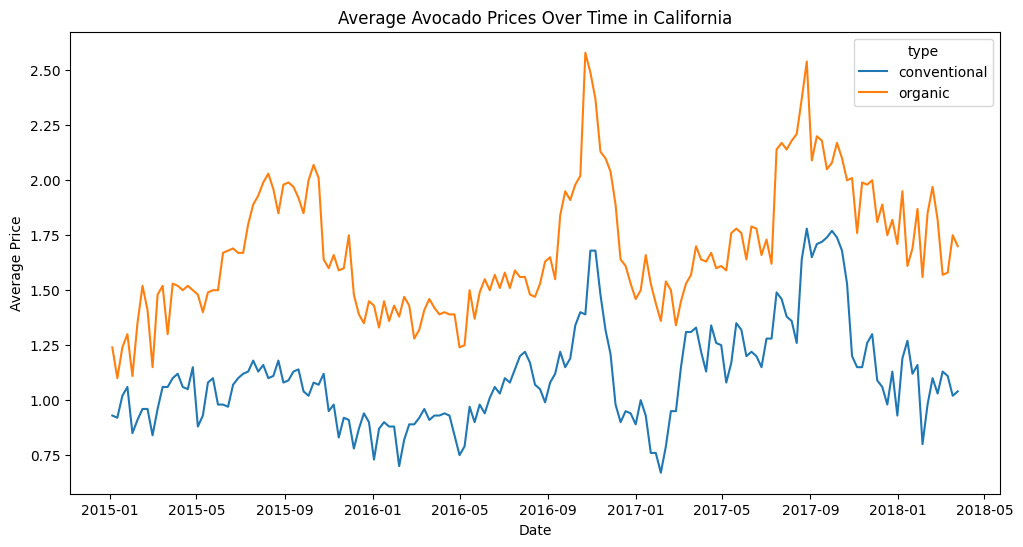

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# convert 'Date' column to datetime format for time series analysis
avocado_data['Date'] = pd.to_datetime(avocado_data['Date'])

# filter for specific region, specifally in California
region_data = avocado_data[avocado_data['region'] == 'California']

#plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=region_data, x='Date', y='AveragePrice', hue='type')
plt.title('Average Avocado Prices Over Time in California')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.show()



# Volume Trends by Type

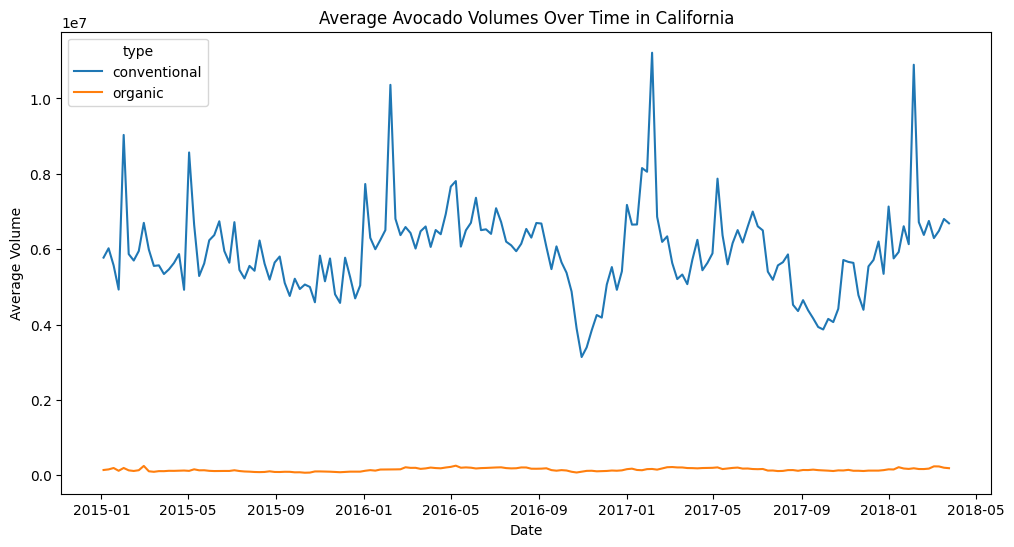

In [15]:
# convert 'Date' column to datetime format for time series analysis
avocado_data['Date'] = pd.to_datetime(avocado_data['Date'])

# filter for specific region, specifally in California
region_data = avocado_data[avocado_data['region'] == 'California']

#plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=region_data, x='Date', y='Total Volume', hue='type')
plt.title('Average Avocado Volumes Over Time in California')
plt.xlabel('Date')
plt.ylabel('Average Volume')
plt.show()


# Analysis

### Volume Trends:

* There’s a clear seasonality in the volume of conventional avocados, with certain peaks and troughs that align with specific times of the year.
* This suggests that supply (harvest times) and demand are affected by the seasons, which may be linked to factors like weather or consumer demand patterns.

### Price Trends:

* The price also fluctuates seasonally, often moving in the opposite direction of volume.
* When volume is high, prices tend to drop, likely due to increased supply. Conversely, when volume is low, prices increase, possibly due to higher demand or lower availability.
  
This seasonality could indicate an inverse relationship between supply (volume) and price, where price rises as supply tightens. This pattern is common in agricultural products influenced by seasonal growing and harvesting cycles.

Let's dive deeper into this analysis with Sales Volume vs. Price Correlation.

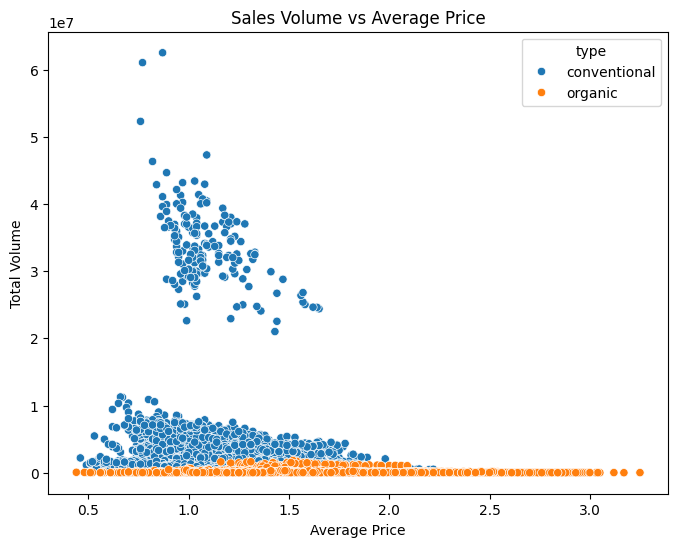

Correlation between Average Price and Sales Volume:
               AveragePrice  Total Volume
AveragePrice      1.000000     -0.192752
Total Volume     -0.192752      1.000000


In [33]:
# scatter plot to visualize correlation
plt.figure(figsize=(8,6))
sns.scatterplot(data=avocado_data, x='AveragePrice', y='Total Volume', hue='type')
plt.title('Sales Volume vs Average Price')
plt.xlabel('Average Price')
plt.ylabel('Total Volume')
plt.show()

# calculate correlation coefficient
correlation = avocado_data[['AveragePrice', 'Total Volume']].corr()
print("Correlation between Average Price and Sales Volume:\n", correlation)


# Analysis

This scatter plot and correlation analysis suggest that price might impact sales volume, but other factors could also be influencing the relationship due to the low correlation. The correlation between avg price and total volume is -19%. Thus indicating a weak negative relationship, meaning that as the Average Price increases, the Total Volume tends to decrease slightly. However, this relationship is not very strong.  

# Sales Volume Comparison by Type

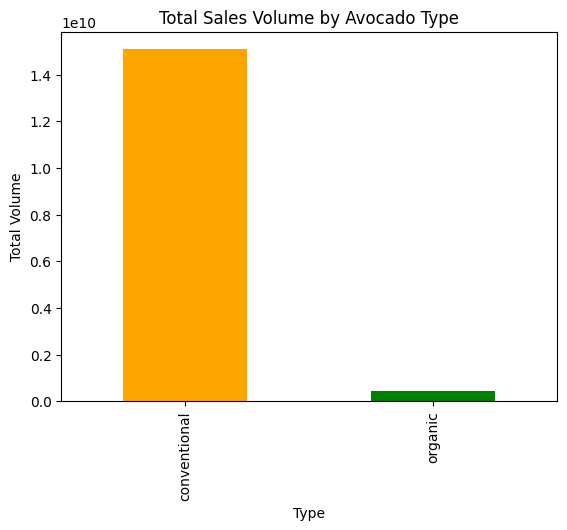

In [16]:
# group by 'type' and calculate sales vol.
volume_by_type = avocado_data.groupby('type')['Total Volume'].sum()

# plot
volume_by_type.plot(kind='bar', color=['orange', 'green'])
plt.title('Total Sales Volume by Avocado Type')
plt.xlabel('Type')
plt.ylabel('Total Volume')
plt.show()

# Monthly and Yearly Price Fluctuations

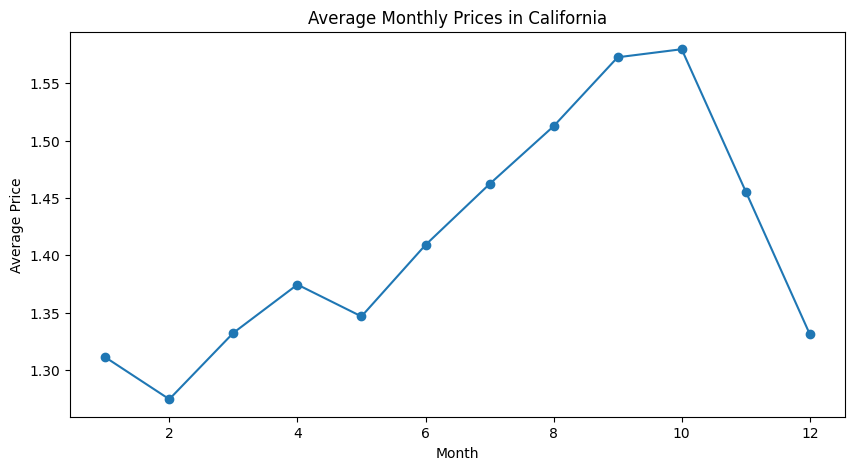

In [24]:
# extract year and month from the date
avocado_data['Year'] = avocado_data['Date'].dt.year
avocado_data['Month'] = avocado_data['Date'].dt.month

# calulate average monthly and yearly prices across all years
yearly_price = avocado_data.groupby('Year')['AveragePrice'].mean()
monthly_price = avocado_data.groupby('Month')['AveragePrice'].mean()

# plot 
plt.figure(figsize=(10, 5))
monthly_price.plot(kind='line', marker='o')
plt.title('Average Monthly Prices in California')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.show()



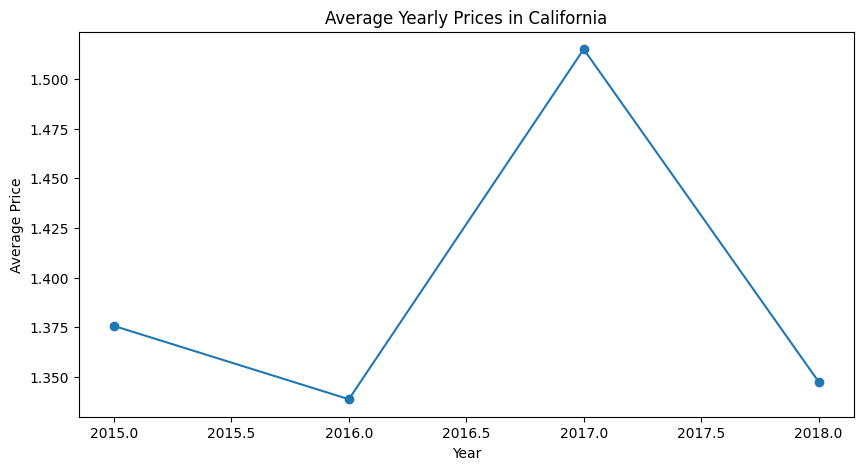

In [25]:
# plot 
plt.figure(figsize=(10, 5))
yearly_price.plot(kind='line', marker='o')
plt.title('Average Yearly Prices in California')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.show()


# Top 5 Regions by Sales Volume

region
TotalUS         5.864740e+09
West            1.086779e+09
California      1.028982e+09
SouthCentral    1.011280e+09
Northeast       7.132809e+08
Name: Total Volume, dtype: float64


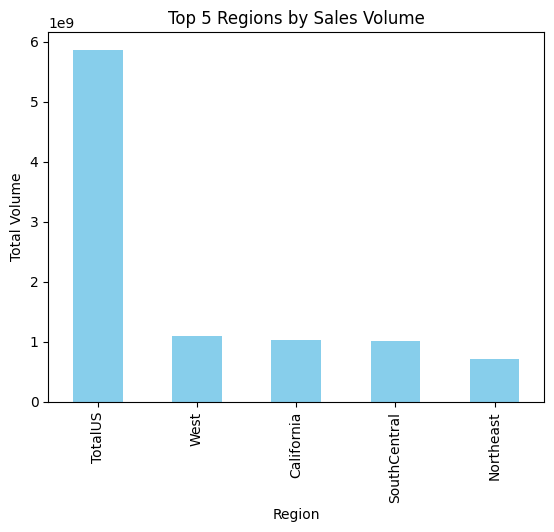

In [35]:
# calculate total volume by region 
volume_by_region = avocado_data.groupby('region')['Total Volume'].sum().sort_values(ascending=False)

# display the top 5 regions
top_5_regions = volume_by_region.head(5)
print(top_5_regions)

# plot top 5 regions by sales volume
top_5_regions.plot(kind='bar', color='skyblue')
plt.title('Top 5 Regions by Sales Volume')
plt.xlabel('Region')
plt.ylabel('Total Volume')
plt.show()


# Revenue by Region

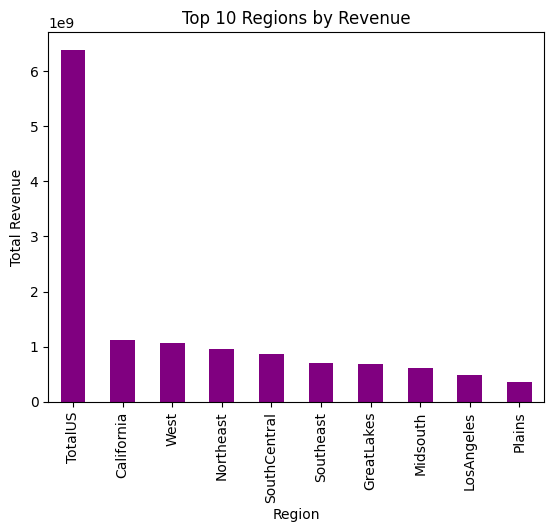

In [36]:
# If Revenue column is not present, calculate it as AveragePrice * Total Volume
avocado_data['Revenue'] = avocado_data['AveragePrice'] * avocado_data['Total Volume']

# Calculate total revenue by region
revenue_by_region = avocado_data.groupby('region')['Revenue'].sum().sort_values(ascending=False)

# Plot revenue by region
revenue_by_region.head(10).plot(kind='bar', color='purple')
plt.title('Top 10 Regions by Revenue')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.show()